In [52]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import classification_report

In [15]:
df_train = pd.read_csv("../../datasets/archive/fashion-mnist_train.csv")
df_test = pd.read_csv("../../datasets/archive/fashion-mnist_test.csv")

In [4]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
train_data = np.array(df_train,'float32')
testdata = np.array(df_test, 'float32')

In [58]:
X_train = train_data[:,1:]
Y_train = train_data[:,0]
X_test = testdata[:,1:]
Y_test = testdata[:,0]

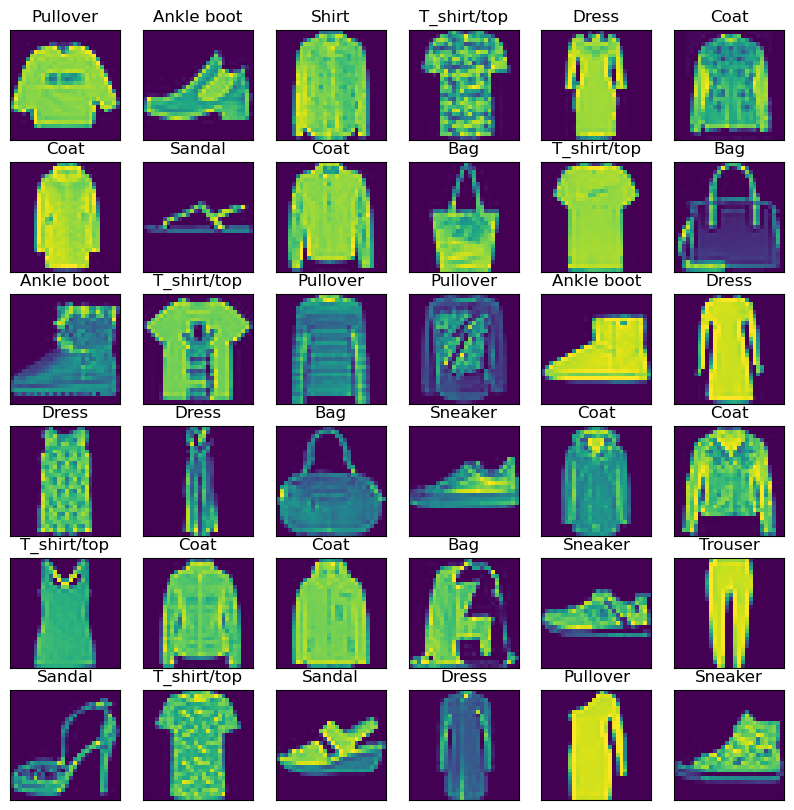

In [23]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)))
    label_index = int(Y_train[i])
    plt.title(class_names[label_index])
plt.show()    


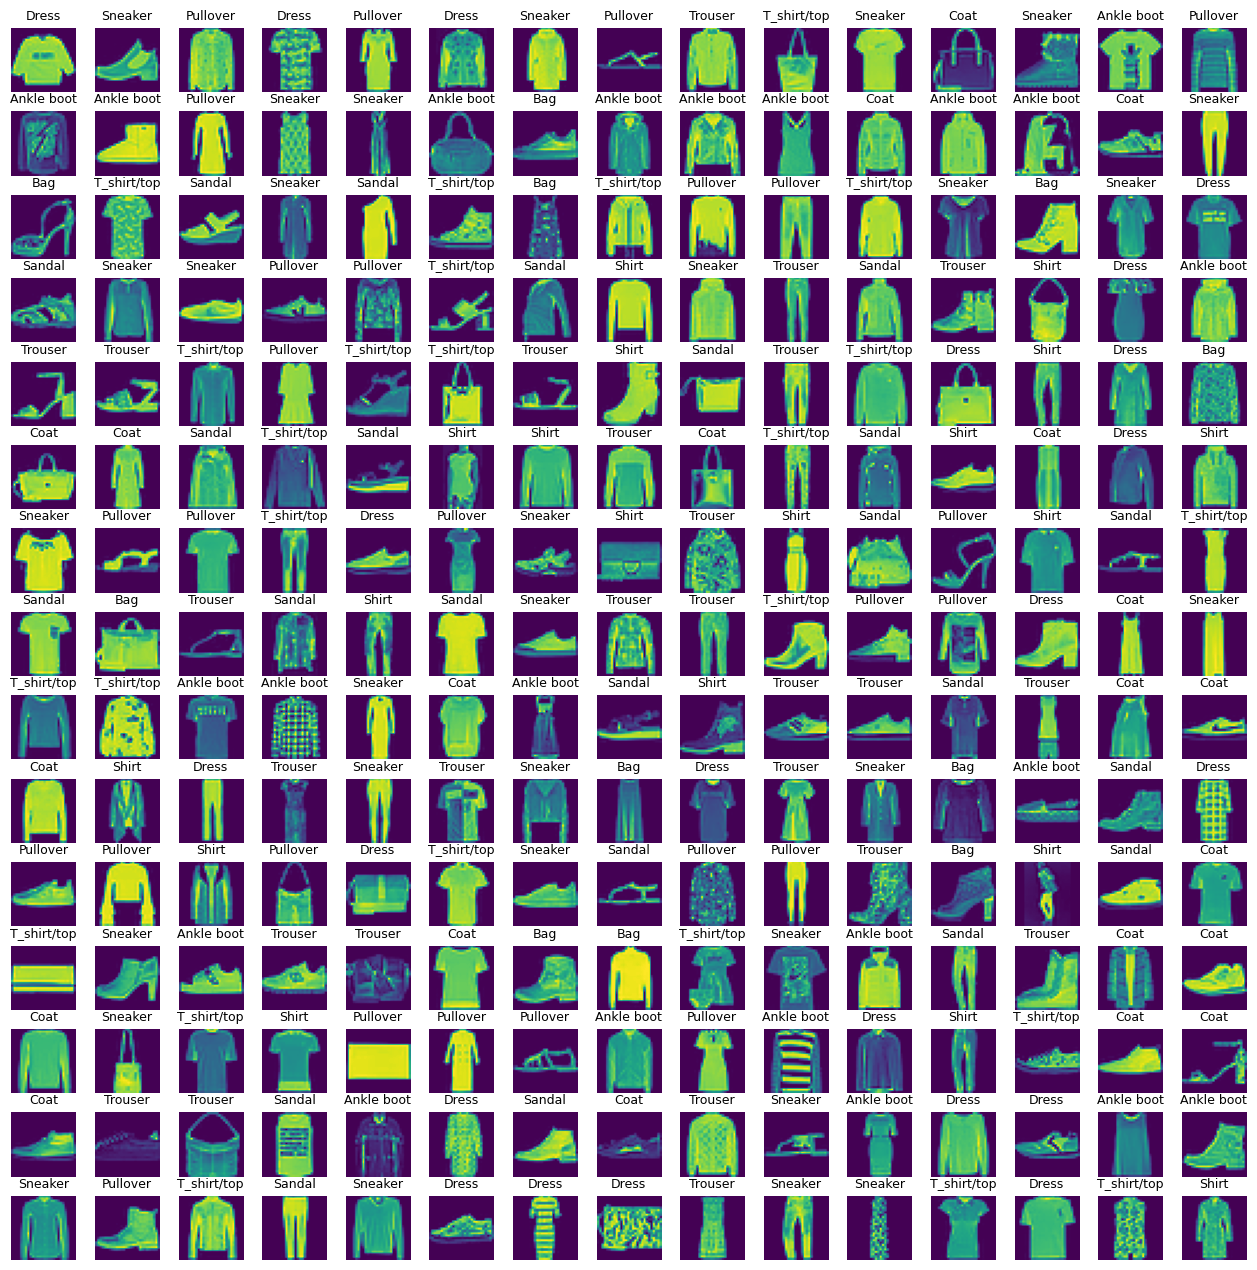

In [27]:
L_grid = 15
W_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize=(16,16))
axes = axes.ravel()
n_train = len(train_data)
for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(train_data[i, 1:].reshape((28,28)))
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.3)

In [28]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [59]:
X_train = X_train.reshape(X_train.shape[0], *image_shape)
X_test = X_test.reshape(X_test.shape[0], *image_shape)

In [46]:
cnn_model = Sequential([Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=image_shape),
                        MaxPooling2D(pool_size=2),
                        Dropout(0.2),
                        Flatten(),
                        Dense(32,activation='relu'),
                        Dense(10,activation='softmax')])

In [47]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [48]:
history = cnn_model.fit(
    X_train,
    Y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
)

Epoch 1/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 952ms/step - accuracy: 0.2660 - loss: 18.3969
Epoch 2/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 642ms/step - accuracy: 0.4355 - loss: 1.6632
Epoch 3/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 689ms/step - accuracy: 0.4557 - loss: 1.5319
Epoch 4/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 769ms/step - accuracy: 0.4802 - loss: 1.4356
Epoch 5/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 820ms/step - accuracy: 0.4733 - loss: 1.3302
Epoch 6/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 849ms/step - accuracy: 0.5788 - loss: 1.1910
Epoch 7/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 793ms/step - accuracy: 0.6890 - loss: 1.0105
Epoch 8/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 816ms/step - accuracy: 0.7331 - loss: 0.9330
Epoch 9/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 821ms/step - accuracy: 0.7487 - loss: 0.8807
Epoch 10/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 803ms/step - accuracy: 0.7591 - loss: 0.8270
Epoch 11/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 847ms/step - accuracy: 0.7711 - loss: 0.7710
Epoch 12/75
15/15 ━━━━━━━━━━━━━━━━━━━━ 1

Text(0.5, 1.0, 'Train - Accuracy')

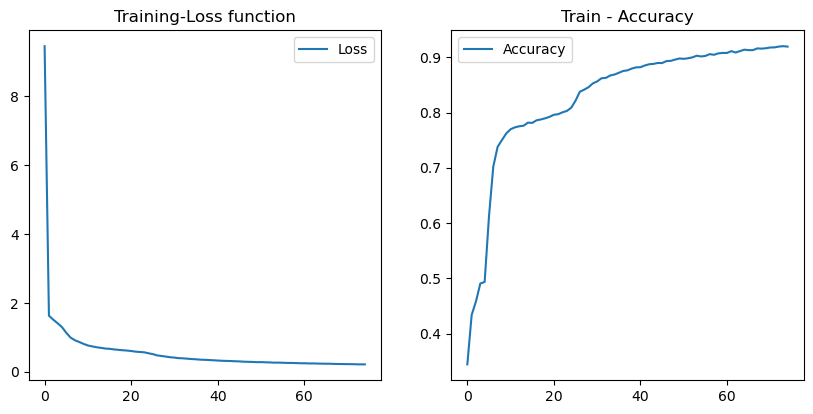

In [50]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history.history['loss'],label='Loss')
plt.legend()
plt.title('Training-Loss function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')

plt.legend()
plt.title('Train - Accuracy')
           

In [60]:
score = cnn_model.evaluate(X_test,Y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2952
Test Accuracy : 0.9064


In [65]:
num_classes = 10
pred = cnn_model.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = df_test.iloc[:,0]
target_names = ["Class{}".format(i) for i in range(num_classes)]
print(classification_report(y_true, y_pred, target_names=target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

      Class0       0.84      0.83      0.84      1000
      Class1       0.99      0.98      0.98      1000
      Class2       0.87      0.84      0.86      1000
      Class3       0.90      0.93      0.92      1000
      Class4       0.85      0.86      0.86      1000
      Class5       0.97      0.97      0.97      1000
      Class6       0.73      0.74      0.74      1000
      Class7       0.96      0.95      0.96      1000
      Class8       0.97      0.97      0.97      1000
      Class9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



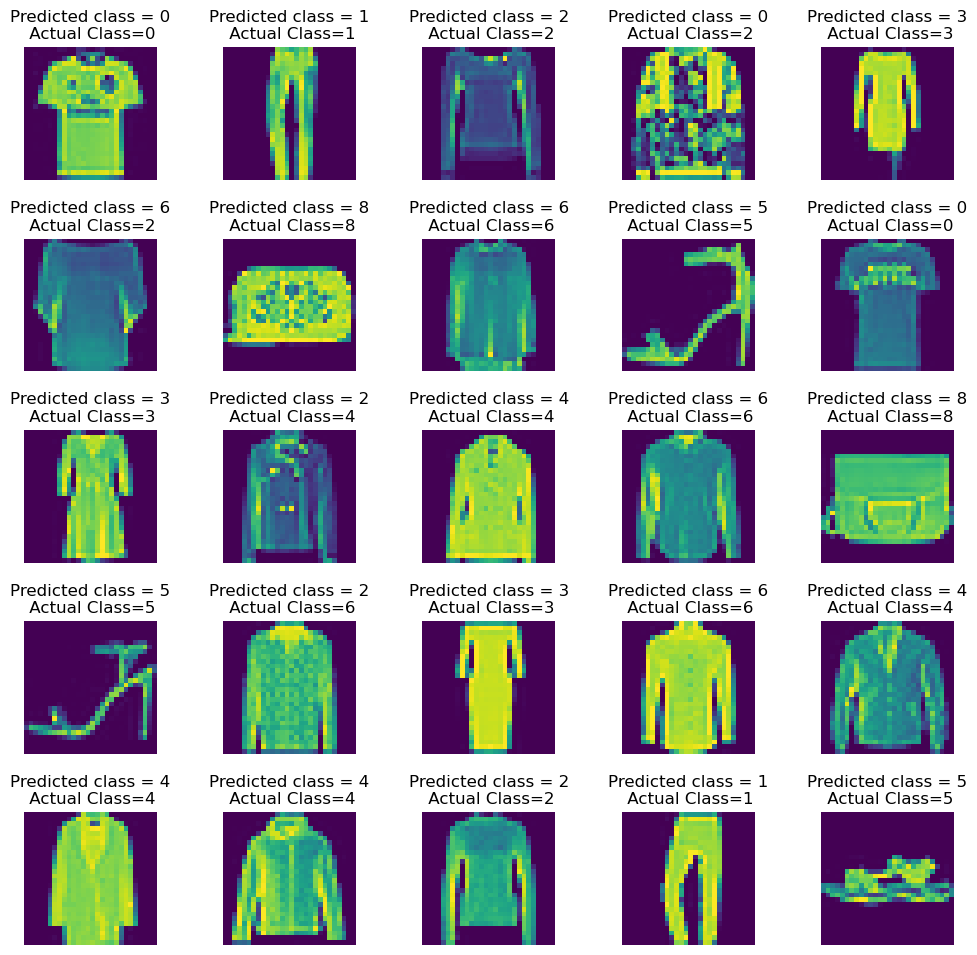

In [73]:
L = 5
W = 5
fig, axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f'Predicted class = {y_pred[i]}\n Actual Class={y_true[i]}')
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)